# EUBUCCO model (based on XGBoost) for predicting the building age using urban morphology
## Demo on Barcelona

In [2]:
# -.-|m { input: false }

# standard libs
import os
import sys
import logging

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'eubucco')
sys.path.append(PROJECT_SRC_PATH)

print(PROJECT_SRC_PATH)
import visualizations
from prediction_age import AgePredictor, AgeClassifier, AgePredictorComparison
import preprocessing as pp
from measurer import Measurer

# external libs
import numpy as np
import pandas as pd
import geopandas as gpd
from xgboost import XGBRegressor, XGBClassifier

import pickle

C:\Users\bbel\OneDrive - NILU\Desktop\Projects\FAIRiCube\UC-NILU\Building age\Clean Code\..\eubucco


## Upload the dara + select buildings in Barcelona

In [4]:
%%time

DATA_DIR = '.'

path_data_ESP = r"..\df-ESP.pkl"

#os.path.join(DATA_DIR, 'df-ESP-exp.pkl')

df = pd.read_pickle(path_data_ESP)

df= df[df['city'] == 'Barcelona']
print('Number of buildings: ', len(df))

Number of buildings:  65793
CPU times: total: 1min 33s
Wall time: 8min 49s


## Regression Model

I AM HERE!


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated

MAE: 15.30 y
RMSE: 20.34 y
R2: 0.3272
R2: nan
MAPE: nan


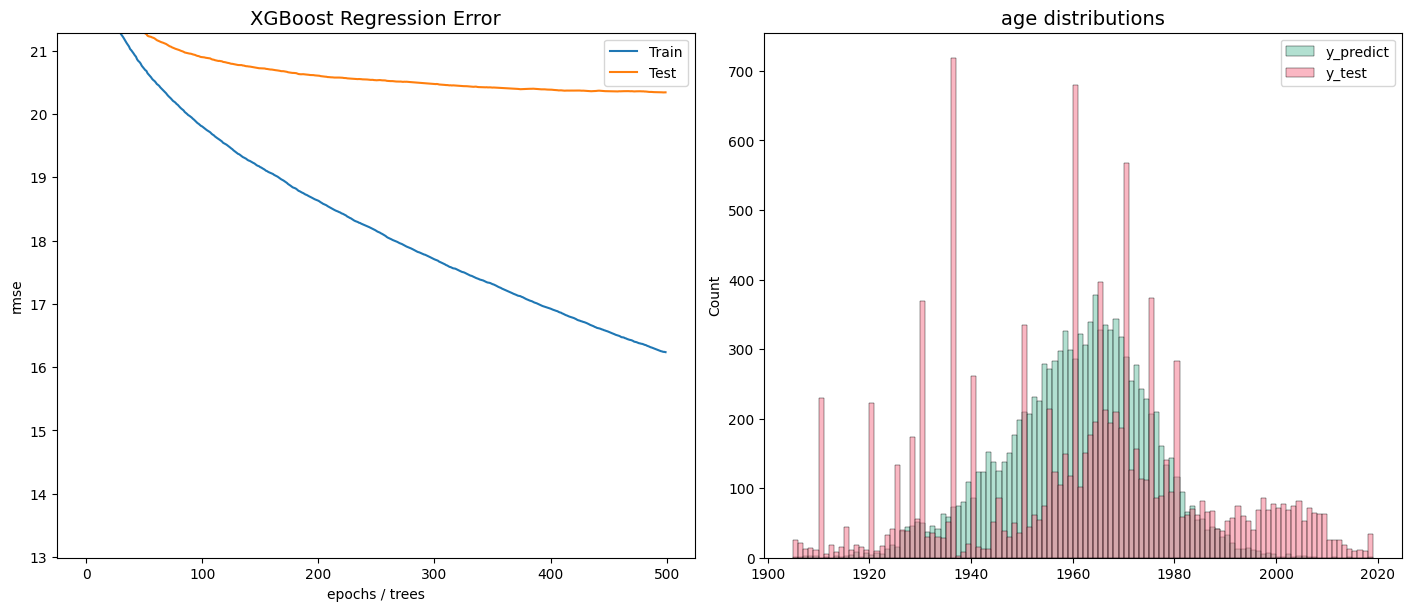

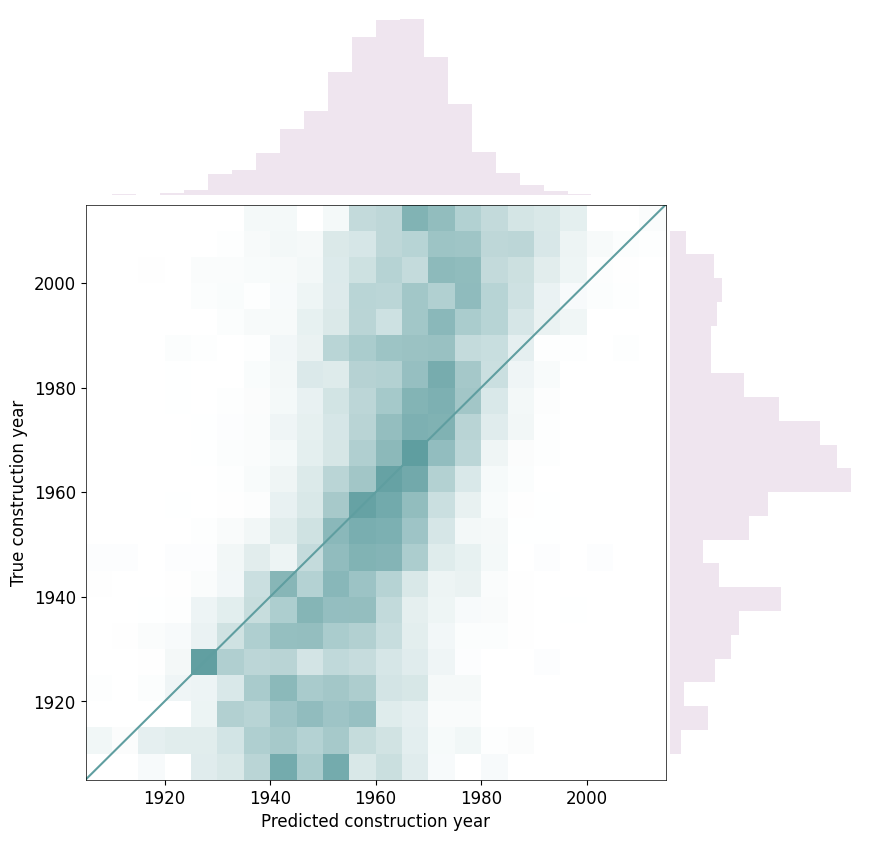

CPU times: total: 2min 26s
Wall time: 22 s


In [5]:
%%time
xgb_model_params = {'tree_method': 'hist'}
xgb_hyperparams = {
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 500,
    'colsample_bytree': 0.5,
    'subsample': 1.0,
}

predictor = AgePredictor(
    model=XGBRegressor(**xgb_model_params),
    df=df,
    test_training_split=pp.split_80_20,
    # cross_validation_split=pp.cross_validation,
    early_stopping=True,
    hyperparameters=xgb_hyperparams,
    preprocessing_stages=[pp.remove_outliers]
)

predictor.evaluate()

## Classification Model

In [ ]:
%%time
tabula_nl_bins = [1900, 1965, 1975, 1992, 2006, 2015, 2022]
equally_sized_bins = (1900, 2020, 10)

classifier = AgeClassifier(
    model=XGBClassifier(**xgb_model_params),
    df=df,
    test_training_split=pp.split_80_20,
    # cross_validation_split=pp.cross_validation,
    preprocessing_stages=[pp.remove_outliers],
    hyperparameters=xgb_hyperparams,
    mitigate_class_imbalance=True,
    # bin_config=equally_sized_bins,
    bins=tabula_nl_bins,
)
classifier.evaluate()

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Classification report:
               precision    recall  f1-score  support
1900-1964      0.775705  0.652030  0.708511     5739
1965-1974      0.448176  0.475792  0.461571     2272
1975-1991      0.364398  0.403011  0.382733     1727
1992-2005      0.305171  0.438743  0.359966      955
2006-2014      0.208577  0.288410  0.242081      371
2015-2021      0.072165  0.107692  0.086420       65
accuracy       0.543804  0.543804  0.543804        0
macro avg      0.362365  0.394280  0.373547    11129
weighted avg   0.581620  0.543804  0.558452    11129
Cohen’s kappa: 0.3421
Matthews correlation coefficient (MCC): 0.3446


FixedFormatter should only be used together with FixedLocator
